# Task 1 - Simple Linear Regression

In [28]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
#Import the data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print("The data : ")
print(data)


The data : 
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.max()

Hours      9.2
Scores    95.0
dtype: float64

In [11]:
data.min()

Hours      1.1
Scores    17.0
dtype: float64

# Data Visualization

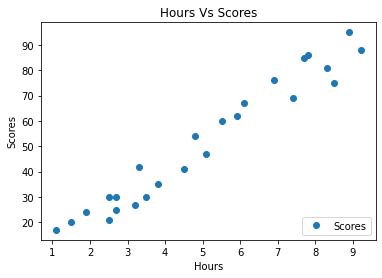

In [19]:
#Plotting the distribution of the scores
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(loc = "lower right")
plt.show()


# Linear Regression Model

In [29]:
#Splitting the training and test data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

# Training Model

In [54]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
y_predict = linear_reg.predict(x_test)
print("Training done")

Training done


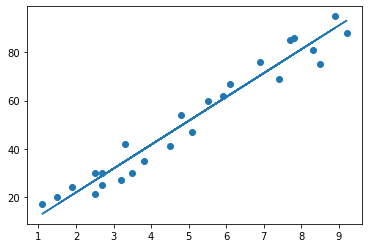

In [36]:
#Plotting Regression line
line = linear_reg.coef_*x +linear_reg.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Checking accuracy for training and test data

In [39]:
print("Training score : ")
train_score = linear_reg.score(x_train, y_train)
print(train_score)
print('Test score : ')
test_score = linear_reg.score(x_test, y_test)
print(test_score)

Training score : 
0.9515510725211552
Test score : 
0.9454906892105354


# Make prediction


In [60]:
#Actual vs predicted
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
print(data1)



   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


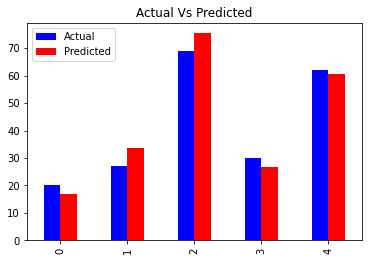

In [65]:
#plot Actual Vs predicted value
data1.plot(kind = 'bar', figsize = (6,4), color = ['B', 'R'], title = 'Actual Vs Predicted' )
plt.legend(loc = "upper left")

In [61]:
#Predict the score for 9.25 hrs
print("Predicted score of students for 9.25 hrs : ", linear_reg.predict([[9.25]]))

Predicted score of students for 9.25 hrs :  [93.69173249]


# Checking the efficiency of Model



In [59]:
mean_sq_er =  mean_squared_error(y_test, y_predict)
mean_abs_er = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test,y_predict)
print(mean_sq_er)
print(mean_abs_er)
print(r2)

21.598769307217456
4.183859899002982
0.9454906892105354


## Accuracy of the model is 94.55% 

## Predicted Score of Students who studied 9.5 hrs is 93.691

## Mean Absolute error is 4.18 %